In [1]:
%pylab inline
from sys import platform
from tqdm import trange
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

if platform == "win32":
    path = 'C:/Users/olive/'
elif platform == "darwin":
    path = '~/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
### LOADS PROCESSED DATA

c_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/comments.csv')
s_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/submissions.csv')

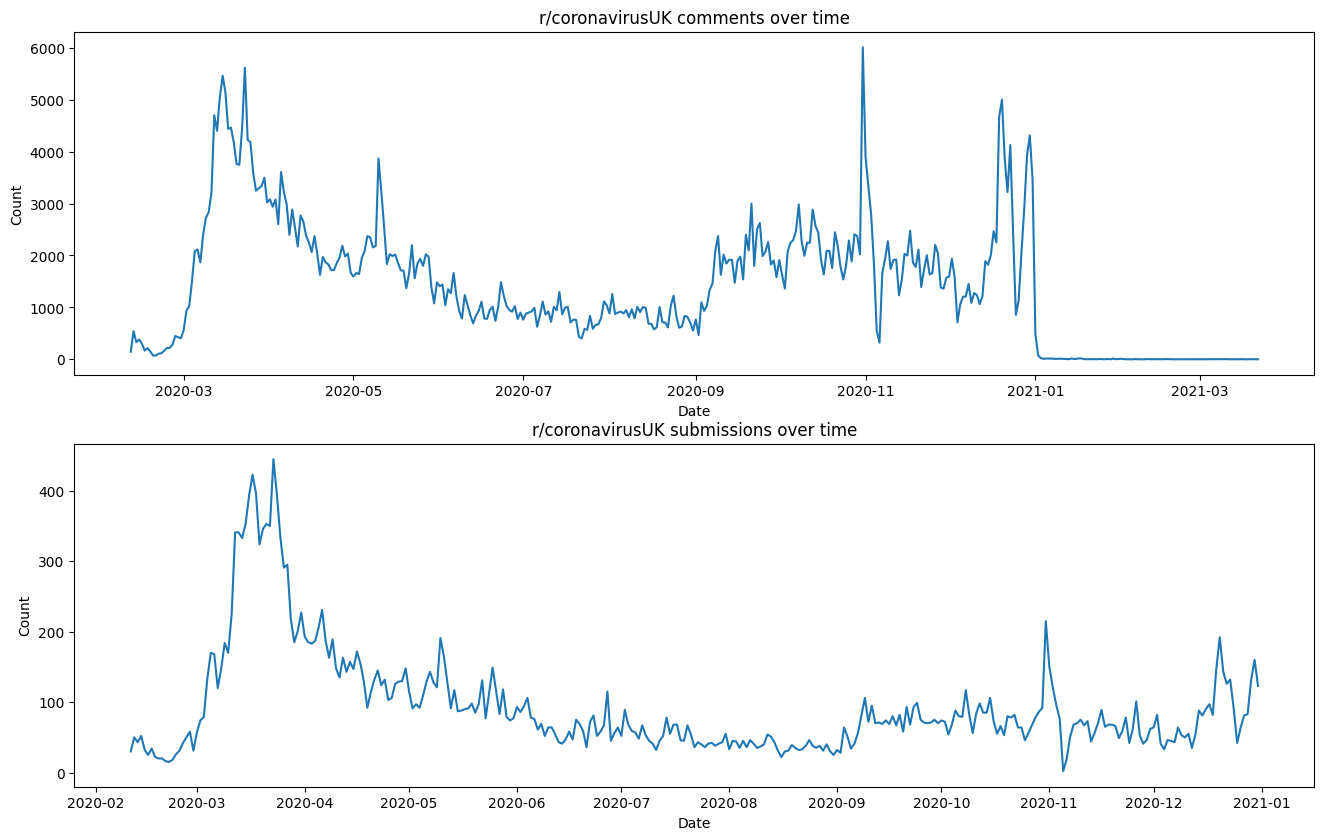

In [7]:
s_df = s_df.sort_values(by='datetime')
c_df = c_df.sort_values(by='datetime')

comments = c_df['datetime'].dt.date.value_counts()
submissions = s_df['datetime'].dt.date.value_counts()

submissions = submissions.sort_index(ascending=True)
comments = comments.sort_index(ascending=True)

fig, (ax1, ax2) = plt.subplots(2, dpi=100)
fig.set_size_inches(16, 10)

ax1.set_title('r/coronavirusUK comments over time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')
ax1.plot(comments.index, comments.values)

ax2.set_title('r/coronavirusUK submissions over time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Count')
ax2.plot(submissions.index, submissions.values)

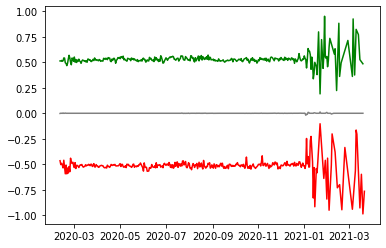

In [5]:
# Mean entiment analysis compound score for every comment over time

c_df = c_df.sort_values(by='datetime')

positive_data = c_df.query(
    'sentiment == "positive"'
).groupby(
    c_df['datetime'].dt.date
).agg(
    {
        'compound_score': mean
    }
)

neutral_data = c_df.query(
    'sentiment == "neutral"'
).groupby(
    c_df['datetime'].dt.date
).agg(
    {
        'compound_score': mean
    }
)


negative_data = c_df.query(
    'sentiment == "negative"'
).groupby(
    c_df['datetime'].dt.date
).agg(
    {
        'compound_score': mean
    }
)

# positive_data = c_df.groupby(
#     c_df['submission_id'],
#     as_index = False
# ).agg(
#     {
#         'compound_score': mean
#     }
# )

# fig, (ax1, ax2, ax3) = plt.subplots(3, dpi=100)
# fig.set_size_inches(16, 10)

# ax1.set_title('Positive sentimnet over time')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Sentiment')
# ax1.plot(positive_data['datetime'].dt.date, positive_data['compound_score'])

# ax2.set_title('Neutral sentiment over time')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Sentiment')
# ax2.plot(submissions.index, submissions.values)

# ax3.set_title('Negative sentiment over time')
# ax3.set_xlabel('Date')
# ax3.set_ylabel('Sentiment')
# ax3.plot(submissions.index, submissions.values)

plt.plot(positive_data, 'g-')
plt.plot(neutral_data, '#808080')
plt.plot(negative_data, 'r-')

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(comments)

In [ ]:
### LATENT DIRICHLET ALLOCATION (LDA)

import re

# Remove punctuation



In [10]:
c_df.sample(10)

,datetime,body,sentiment,compound_score,submission_id,parent_id
id,,,,,,
fmfpwkq,2020-04-04 21:33:07,If the weather is nice and they are still sell...,positive,0.7184,fuuvi1,t1_fmf7lf0
fqw93m6,2020-05-17 07:20:40,"If that's a racist slur then so is ""Karen""\n\n...",positive,0.4982,gkw4uu,t1_fqtxm2g
gby98c4,2020-11-11 17:07:38,Thanks for your help. I had to do the drive th...,positive,0.6808,jsbqmx,t1_gby7x3n
fkfy1vp,2020-03-14 00:20:55,Some of us have been paying attention from the...,negative,-0.9629,fi6ziz,t1_fkfm3g0
ghj1axg,2020-12-30 19:36:08,"It's not all or nothing, no one in the vaccine...",negative,-0.7279,kn0o7b,t1_ghj0h63
frw5s54,2020-05-26 18:57:12,"Curious, why is Belgium’s figures so high?",positive,0.3182,gqxpft,t3_gqxpft
g7pz6pb,2020-10-04 21:46:21,Surprise surprise. Its also no surprise that t...,positive,0.3369,j55yjx,t1_g7pxukt
fomuvpu,2020-04-26 13:36:23,The WHO suggests that with an antibody test yo...,neutral,0.0000,g8buor,t1_fommp1o
ggocxud,2020-12-22 08:51:30,[removed],neutral,0.0000,khwlpv,t1_ggo5uhp
